In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import os

base_path = "/content/drive/MyDrive/ds_kanan"

os.makedirs(f"{base_path}/csv_files", exist_ok=True)
os.makedirs(f"{base_path}/outputs", exist_ok=True)

print("Folder structure created in Google Drive.")


Folder structure created in Google Drive.


In [4]:
import pandas as pd

# Load the datasets from Drive
trader_path = "/content/drive/MyDrive/ds_kanan/raw_files/historical_data.csv"
sentiment_path = "/content/drive/MyDrive/ds_kanan/raw_files/fear_greed_index.csv"

# Read CSVs
trader_df = pd.read_csv(trader_path)
sentiment_df = pd.read_csv(sentiment_path)

# Display first few rows
print(" Trader Data:")
display(trader_df.head())

print("Sentiment Data:")
display(sentiment_df.head())


 Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [17]:
import pandas as pd

trader_df = pd.read_csv("/content/drive/MyDrive/ds_kanan/raw_files/historical_data.csv")
sentiment_df = pd.read_csv("/content/drive/MyDrive/ds_kanan/raw_files/fear_greed_index.csv")

In [23]:
# Fix date formats for merging
trader_df['date_only'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce').dt.strftime('%Y-%m-%d')
sentiment_df['date_only'] = pd.to_datetime(sentiment_df['date']).dt.strftime('%Y-%m-%d')


In [24]:
merged_df = pd.merge(trader_df,sentiment_df[['date_only', 'classification']], on='date_only', how='left')

In [26]:
merged_df.dropna(subset=['classification'], inplace=True)

In [27]:
print(" Total rows after merge:", len(merged_df))

 Total rows after merge: 35864


In [28]:
display(merged_df[['Account', 'Coin', 'Execution Price', 'Closed PnL', 'classification']].head())

,Account,Coin,Execution Price,Closed PnL,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,0.0,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,0.0,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,0.0,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,0.0,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,0.0,Greed


In [29]:
merged_df.to_csv("/content/drive/MyDrive/ds_kanan/csv_files/merged_data.csv", index=False)
print(" Clean merged file saved!")


 Clean merged file saved!


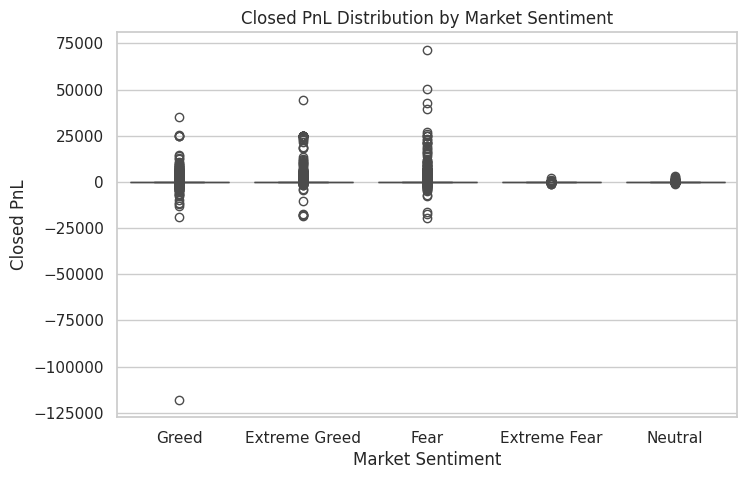

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x='classification', y='Closed PnL', data=merged_df)
plt.title("Closed PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.show()


In [31]:
plt.savefig("/content/drive/MyDrive/ds_kanan/outputs/pnl_by_sentiment.png")

<Figure size 640x480 with 0 Axes>

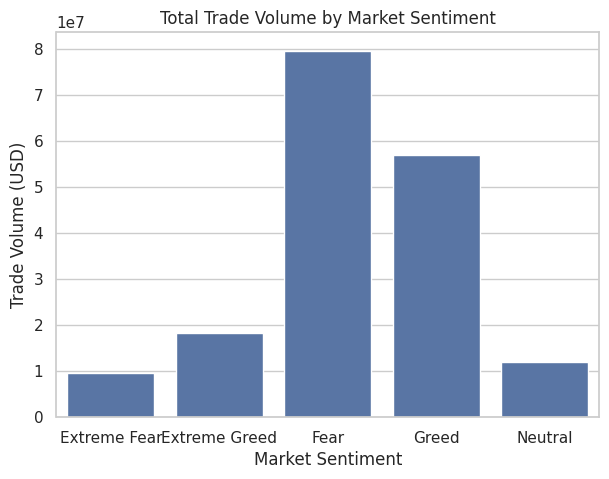

In [32]:
# Calculate trade volume
merged_df['Trade Volume'] = merged_df['Execution Price'] * merged_df['Size Tokens']

# Aggregate volume by sentiment
volume_df = merged_df.groupby('classification')['Trade Volume'].sum().reset_index()

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(x='classification', y='Trade Volume', data=volume_df)
plt.title("Total Trade Volume by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Volume (USD)")
plt.show()


In [33]:
# Save the figure
plt.savefig("/content/drive/MyDrive/ds_kanan/outputs/volume_by_sentiment.png")

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-34-1855095142.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coin', y='Closed PnL', data=avg_pnl_by_coin, palette='viridis')


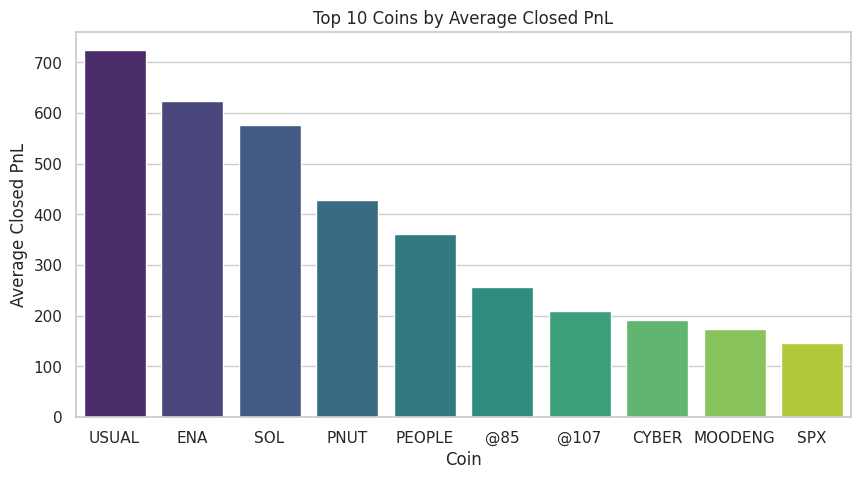

In [34]:
# Group by Coin and calculate average PnL
avg_pnl_by_coin = (
    merged_df.groupby('Coin')['Closed PnL']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Coin', y='Closed PnL', data=avg_pnl_by_coin, palette='viridis')
plt.title("Top 10 Coins by Average Closed PnL")
plt.xlabel("Coin")
plt.ylabel("Average Closed PnL")
plt.show()


In [35]:
# Save chart
plt.savefig("/content/drive/MyDrive/ds_kanan/outputs/avg_pnl_by_coin.png")

<Figure size 640x480 with 0 Axes>